In [1]:
using PyPlot
using DataFrames
using JLD
plt = PyPlot

PyPlot

In [134]:
tadata = readtable("../_DATA_RK_AES_1R_uptoSB_1Gsps_7304t.csv", header=false);
tadata = tadata[:,1:end-1]
writetable("../template_train.csv",tadata,header = false)
tempdata = tadata[1:end-10,:];
testdata = tadata[end-9:end,:];

In [18]:
plaintexts = tempdata[1]
ciphertexts = tempdata[2]
keys = tempdata[3]
traces = Array(tempdata[:,4:end]);
plaintexts

7295-element DataArrays.DataArray{String,1}:
 "FDD7ADDB7133475C9C4E32435EB5D990"
 "F3EE4DB50DAE444CBC586AA9C3791E2B"
 "4E2964311C99CF970957C42CD13EAD68"
 "1A4A3B98B1A0EC4F93601F18C89D9823"
 "2F07F43451A874591FB6ABB6E9177B7D"
 "AA028E793E867AAE3C159DBB7AB6CE6C"
 "BFA1FDC949791772D6E179FAF436657C"
 "E5A16DC60E1EE5A98C46F73C0AB8DF68"
 "E73FF64819B13431EA1CA35C0C7FBA05"
 "AF21D5D948075DA0BB533D0381DB681D"
 "011012B4401C62346D3CDCF27B889C0C"
 "8BF28CE9E3061FDFE1568DC57430B00F"
 "B3865AFB6D06C593BEA16C0C2B6B2432"
 ⋮                                 
 "F5022FD2D2DAC6FC81161F1BE34C9D84"
 "1796CFBAC7044C1A74DDD635F238F58F"
 "0A1A0D1F2126DB9110141C4BF5464053"
 "FDAAF169A1C2A0F0B6145EF504900A48"
 "219011C83F7D63F1BA3DA9B2E800252D"
 "9C823847478CEE477A1D690DC7E68D80"
 "0AD32965357714804700AE6418ED08B5"
 "EF30588258C20195A2C94E21135529D4"
 "AF29A815D7C0F8256EB70047DE892E8C"
 "14B41D978E0B2747D194C26B28F26CF1"
 "D6DAB4EE44F3DE2F383213A0C2BAB718"
 "9BC10C5F389245A402614342FD8DFC7B"

In [16]:
#The S_box for AES, similar components needed to be defined for each type of cipher one requires to attack
sbox = [
0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
];
HW = Dict();
for i in 0:255
    b = bin(i,8)
    hw = 0
    for j in 1:8
        if b[j] == '1'
          hw += 1
        end
    end
    HW[i] = hw
end

In [21]:
#first building templates only for the first byte, templates will be 
#based on the HW values which will vary from 0 to 8 hence 9 templates

#storing the sbox result of the first bytes in the sample
tempSbox = zeros(Int,length(plaintexts))
for i in 1:length(plaintexts)
    fp_byte = parse(Int,plaintexts[i][1:2],16)
    fk_byte = parse(Int,keys[i][1:2],16)
    tempSbox[i] = sbox[fp_byte$fk_byte+1]
end
#storing the HW values of the first byte of the output of the sbox
#this will decide which trace belongs to which class 
tempHW = zeros(Int,length(plaintexts))
for i in 1:length(plaintexts)
    tempHW[i] = HW[tempSbox[i]]
end

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] $ at ./deprecated.jl:376 [inlined]
 [3] macro expansion at ./In[21]:9 [inlined]
 [4] anonymous at ./<missing>:?
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/hesl/.julia/v0.6/IJulia/src/execute_request.jl:156
 [7] eventloop(::ZMQ.Socket) at /home/hesl/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##9#12)() at ./task.jl:335
while loading In[21], in expression starting on line 6


In [29]:
#a dictionary which consistis of elements of the same class bunched together
#as a 2D array with key equal to their representing HW values
tempClass = Dict()
for i in 0:8
    tempClass[i] = []
end
#filling the dictionary with the right traces in right classes
for i in 1:length(plaintexts)
    hw = tempHW[i]
    push!(tempClass[hw],traces[i,:])
end

In [44]:
mean([[1 2 3],[4 5 6]])

1×3 Array{Float64,2}:
 2.5  3.5  4.5

In [47]:
#now I have to calculate the means of traces present in each of the classes
tempMeans = Dict()
for i in 0:8
    tempMeans[i] = mean(tempClass[i])
end

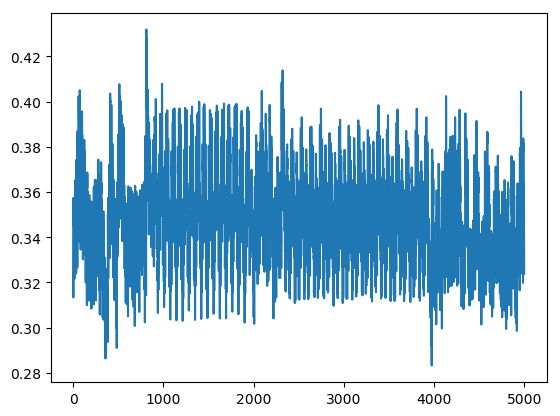

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f458d774d50>

In [51]:
plt.plot(tempMeans[7])

In [81]:
#now to figure out the POI's I need to take the sum of absolute diffrence
#of all the possible pairs of the means (ie of 9C2 = 36 pairs)
tempSumDiff = zeros(length(traces[1,:]))
for i in 0:8
    for j in i+1:8
        tempSumDiff += abs(tempMeans[i] - tempMeans[j])
    end
end

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::Array{Float64,1}) at ./deprecated.jl:57
 [3] macro expansion at ./In[81]:6 [inlined]
 [4] anonymous at ./<missing>:?
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/hesl/.julia/v0.6/IJulia/src/execute_request.jl:156
 [7] eventloop(::ZMQ.Socket) at /home/hesl/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##9#12)() at ./task.jl:335
while loading In[81], in expression starting on line 4


In [132]:
tempSumDiff

5000-element Array{Float64,1}:
 0.014191  
 0.00840075
 0.0132113 
 0.0087287 
 0.00689993
 0.00980851
 0.0153098 
 0.0135837 
 0.00489183
 0.0104815 
 0.00852299
 0.0162153 
 0.00790726
 ⋮         
 0.00761089
 0.0186294 
 0.0121914 
 0.00912116
 0.0237856 
 0.0108217 
 0.0100808 
 0.0131581 
 0.0105644 
 0.00827991
 0.014499  
 0.0102208 

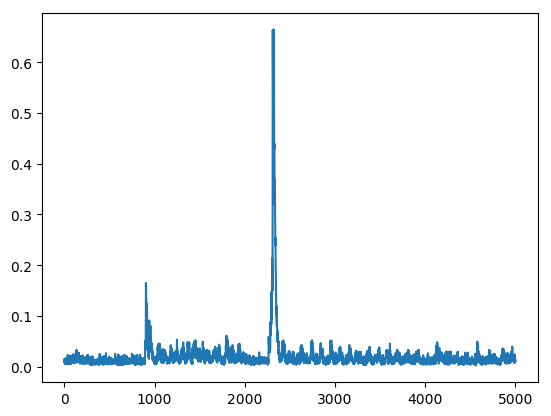

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f458d2d9250>

In [74]:
plt.plot(tempSumDiff)

In [82]:
#now i need to find some POI's from tempSumDiff
n_pois = 10
poi_spacing = 5

POI = []
for i in 1:n_pois
    nextPoi = indmax(tempSumDiff)
    push!(POI,nextPoi)
    inv_left = max(1,nextPoi - poi_spacing)
    inv_right = min(length(tempSumDiff),nextPoi+poi_spacing)
    for j in inv_left:inv_right
        tempSumDiff[j] = 0
    end
end

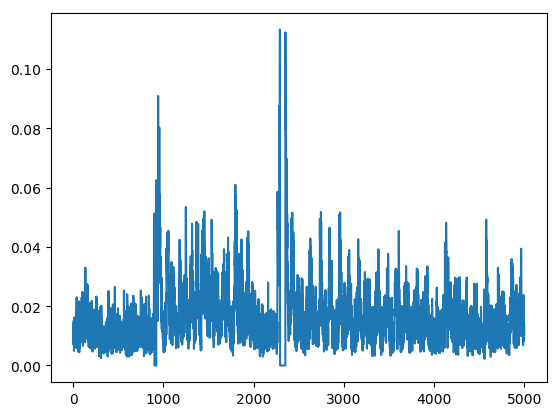

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f458d105390>

In [83]:
plt.plot(tempSumDiff)

In [84]:
POI

10-element Array{Any,1}:
 2322
 2311
 2329
 2335
 2341
 2304
  905
 2298
 2347
  916

In [86]:
mean(tempClass[0])

5000-element Array{Float64,1}:
 0.323714
 0.313775
 0.344069
 0.35733 
 0.345166
 0.353829
 0.33899 
 0.323615
 0.337615
 0.347836
 0.342217
 0.346811
 0.339954
 ⋮       
 0.374404
 0.38293 
 0.377848
 0.381646
 0.360008
 0.350964
 0.36403 
 0.355269
 0.341684
 0.349623
 0.334168
 0.324354

In [88]:
tempClass[0][POI]

LoadError: [91mBoundsError: attempt to access 21-element Array{Any,1} at index [Any[2322, 2311, 2329, 2335, 2341, 2304, 905, 2298, 2347, 916]][39m

In [92]:
#now for each class I want to build a multivariate model for which
#I need to define the mean vector and the covariance matrix
tempMeanCov = Dict()
for i in 0:8
    meanvec = mean(tempClass[i])[POI]
    traceMat = zeros(length(tempClass[i]),length(traces[1,:]))
    for j in 1:length(tempClass[i])
        tr = tempClass[i][j]
        for k in 1:length(traces[1,:])
            traceMat[j,k] = tr[k]
        end
    end    
    
    covmat = zeros(length(POI),length(POI))
    for u  in 1:length(POI)
        for v in 1:length(POI)
            covmat[u,v] = cov(traceMat[:,POI[u]],traceMat[:,POI[v]])
        end
    end
    tempMeanCov[i] = [meanvec, covmat]
end

In [99]:
tempMeanCov[1][1]

10-element Array{Float64,1}:
 0.384753
 0.381346
 0.350629
 0.37006 
 0.364655
 0.33656 
 0.396005
 0.357477
 0.340379
 0.402856

In [98]:
function mvgaussian_pdf(x,μ,Σ)
  n = length(μ)
  pre_exp = 1/(det(Σ)*(2*pi)^(n/2))
  expo = *((x-μ)',inv(Σ),(x-μ))[1]
  pre_exp*e^(-0.5*expo)
end

mvgaussian_pdf (generic function with 1 method)

In [104]:
#now that I have mean and cov matrix let's test
tpt = testdata[1,1]
tct = testdata[2,1]
tk = testdata[3,1]
ttrace = Array(testdata[1,4:end])[POI]
tpt

"4B0E7004D53F4721D6EE5E5CF7878417"

In [107]:
res = []
for sk in 0:255
    hw = HW[sbox[parse(Int,tpt[1:2],16)$sk+1]]
    μ = tempMeanCov[hw][1]
    Σ = tempMeanCov[hw][2]
    push!(res, mvgaussian_pdf(ttrace,μ,Σ))
end

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] $ at ./deprecated.jl:376 [inlined]
 [3] macro expansion at ./In[107]:3 [inlined]
 [4] anonymous at ./<missing>:?
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/hesl/.julia/v0.6/IJulia/src/execute_request.jl:156
 [7] eventloop(::ZMQ.Socket) at /home/hesl/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##9#12)() at ./task.jl:335
while loading In[107], in expression starting on line 2


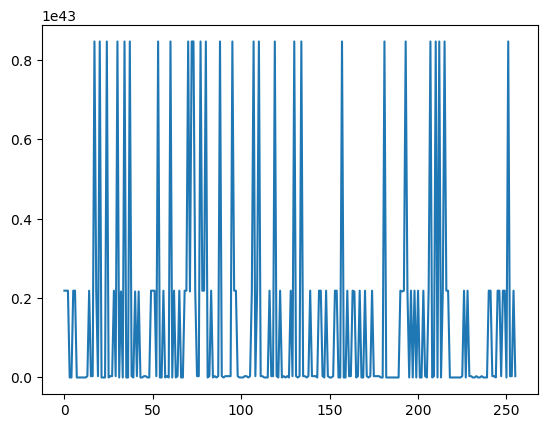

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f458cf6e890>

In [108]:
plt.plot(res)

In [119]:
res[18]==res[54]

true

In [114]:
parse(Int,tk[1:2],16)

53

In [131]:
grp_data = groupby(tadata,3)
grp_data

DataFrames.GroupedDataFrame  7305 groups with keys: [3]
First Group:
1×5003 DataFrames.SubDataFrame{Array{Int64,1}}
│ Row │ x1                                 │
├─────┼────────────────────────────────────┤
│ 1   │ "3715B7388D5BA763AFCD48A61412670E" │

│ Row │ x2                                 │
├─────┼────────────────────────────────────┤
│ 1   │ "47156F486B080E12AE530CA1D7A108DF" │

│ Row │ x3                                 │ x4      │ x5      │ x6      │
├─────┼────────────────────────────────────┼─────────┼─────────┼─────────┤
│ 1   │ "000109DB692DC9E2DA974D5A0E8186F4" │ 0.32576 │ 0.31808 │ 0.34672 │

│ Row │ x7      │ x8     │ x9      │ x10    │ x11    │ x12     │ x13     │
├─────┼─────────┼────────┼─────────┼────────┼────────┼─────────┼─────────┤
│ 1   │ 0.35856 │ 0.3452 │ 0.35312 │ 0.3416 │ 0.3208 │ 0.33928 │ 0.34792 │

│ Row │ x14     │ x15     │ x16     │ x17   │ x18     │ x19     │ x20     │
├─────┼─────────┼─────────┼─────────┼───────┼─────────┼─────────┼─────────┤
│ 1   │ 